Text(0.5, 0, 'Values')

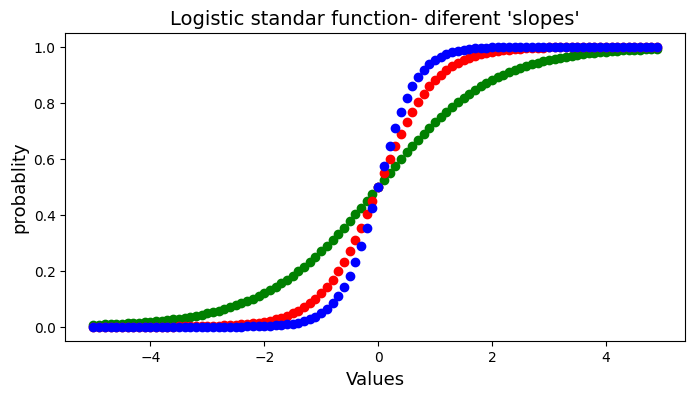

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import math

#creation of a logistic evectorial function (unfics)
logistic = np.frompyfunc(lambda b0, b1, x:
                        1/(1+math.exp(-(b0 + b1*x))),
                        3, 1)

#graphication of logistic function with diffetent slopes
plt.figure(figsize=(8,4))

plt.scatter(np.arange(-5, 5, 0.1),
            logistic(0, 1, np.arange(-5,5,0.1)),
            color="green"
            )

plt.scatter(np.arange(-5, 5, 0.1),
            logistic(0, 2, np.arange(-5,5,0.1)),
            color="red"
            )

plt.scatter(np.arange(-5, 5, 0.1),
            logistic(0, 3, np.arange(-5,5,0.1)),
            color="blue"
            )

plt.title("Logistic standar function- diferent 'slopes'", fontsize= 14.0)
plt.ylabel("probablity", fontsize=13.0)
plt.xlabel("Values", fontsize= 13.0)

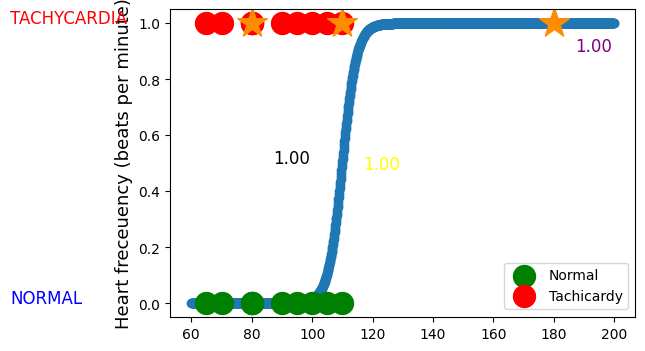

In [47]:
#normal people since 60 to 100 heart beats.
#people with tachycardia of untl 220 heart beats per minute

normal_people =[65, 70, 80,80,80,
                90,95,100,105,110]

tachicardia_people = [105, 110, 110, 120, 120,
                      130, 140, 180, 185,190]

#graphiv of a logistic function

plt.figure(figsize=(6,4))
#3y = b0 + b1x
#y = -46.68057196 + 0.42460226 x
plt.scatter(np.arange(60,200,0.1),
            logistic(-46.68057196, 0.42460226, np.arange(60,200,0.1)))

#graphic of heart frecency of people

plt.scatter(normal_people, [0]*10,
            marker="o", c="green", s=250, label="Normal")

plt.scatter(normal_people, [1]*10,
            marker="o", c="red", s=250, label="Tachicardy")

#graphic probability to three people
individuals = [80,110,180]
probability = logistic(46.68057196 , 0.42460226, individuals)

plt.scatter(individuals, probability, marker="*", c="darkorange", s=500)

plt.text(individuals[0]+7, 0.5, "%0.2f" % probability[0], size=12, color="black")
plt.text(individuals[1]+7, 0.48, "%0.2f" % probability[1], size=12, color="yellow")
plt.text(individuals[2]+7, 0.90, "%0.2f" % probability[2], size=12, color="purple")

plt.text(0,1, "TACHYCARDIA", size=12, color="red")
plt.text(0,0, "NORMAL", size=12, color="blue")
plt.ylabel("probability of tachicardi", fontsize=13.0)
plt.ylabel("Heart freceuency (beats per minute)", fontsize=13.0)
plt.legend(bbox_to_anchor=(1,0.2))
plt.show()

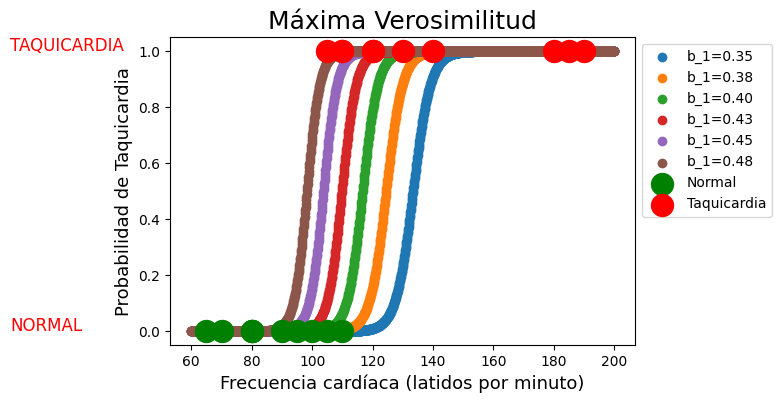

In [48]:
# Diferentes funciones logísticas con diferentes "pendientes"
plt.figure(figsize=(6, 4))

for b1 in np.arange(0.35, 0.49, 0.025):
    plt.scatter(np.arange(60, 200, 0.1),
                logistic(-46.68057196,
                          b1,
                          np.arange(60, 200, 0.1)),
                label="b_1=%0.2f" % b1)

# Graficamos la frecuencia cardíaca de las personas
plt.scatter(normal_people, [0]*10,
            marker="o", c="green", s=250, label="Normal")
plt.scatter(tachicardia_people, [1]*10,
            marker="o", c="red", s=250, label="Taquicardia")

plt.title("Máxima Verosimilitud", fontsize=18.0)
plt.text(0, 1, "TAQUICARDIA", size=12, color="red")
plt.text(0, 0, "NORMAL", size=12, color="red")
plt.ylabel("Probabilidad de Taquicardia", fontsize=13.0)
plt.xlabel("Frecuencia cardíaca (latidos por minuto)", fontsize=13.0)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [49]:
#model of logistic regresion
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

frecuencias_cardiacas = [[65], [70], [80], [80], [80],
                         [90], [95], [100], [105], [110],
                         [105], [110], [110], [120], [120],
                         [130], [140], [180], [185], [190]]

clase = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#creatuib of a training set and a test set for the model
training_data, test_data, training_class, test_class = \
    train_test_split(frecuencias_cardiacas, clase, test_size=0.30)


In [50]:
#creation of a model
myModel = LogisticRegression().fit(training_data, training_class)
np.set_printoptions(suppress=True)
print(myModel.predict(test_data))
print(myModel.predict_proba(test_data))
print(myModel.score(test_data, test_class))

print(f"b0 & b1 metrics: ", myModel.intercept_, myModel.coef_)

[0 0 1 1 0 0]
[[0.99923407 0.00076593]
 [0.99923407 0.00076593]
 [0.         1.        ]
 [0.00010562 0.99989438]
 [0.84948874 0.15051126]
 [0.98848045 0.01151955]]
1.0
b0 & b1 metrics:  [-28.94586399] [[0.27215267]]
